In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
##LOAD DATA
data = np.loadtxt("Sumur A.las", skiprows=7198)
column = ['DEPTH','CALI','RHOB','DT','DTS','GR','LLD','LLS','MSFL','NPHI','PEF','SP']
data = pd.DataFrame(data, columns=column)
data = data.drop([7420],axis=0)

IV = data[['GR','RHOB','NPHI','LLD','LLS','DT']].values
V = data[['DTS']].values
Depth = data.iloc[:,0].values

<AxesSubplot:>

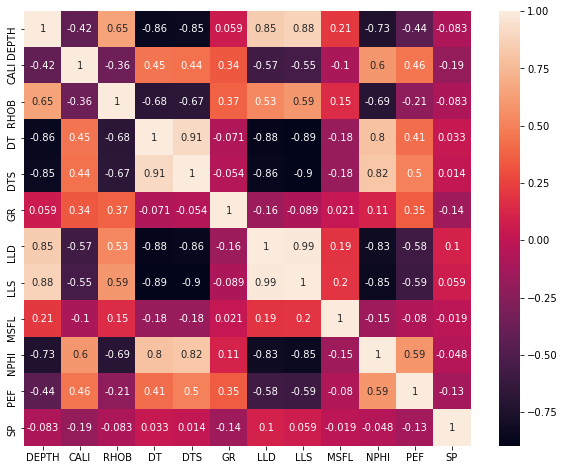

In [ ]:
plt.figure(figsize=(10,8))
sb.heatmap(data.corr(), annot=True)

*Coefficient Correlation*
GR: -0.054324904969241826
RHOB: -0.6679584725488587
NPHI: 0.8164909539671116
LLD: -0.8618882205083073
LLS: -0.8965909965635424
DT: 0.9097636656738288


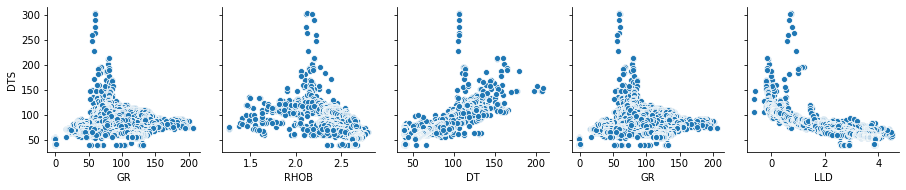

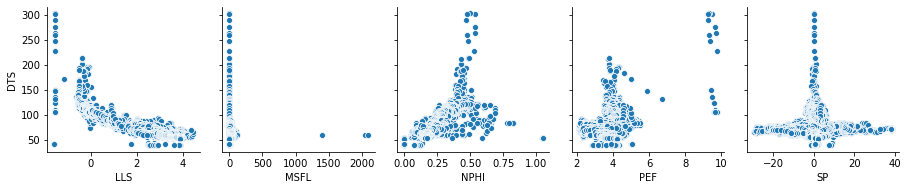

In [ ]:
##Correlation
#IV to V
print('*Coefficient Correlation*')
print('GR:',np.corrcoef(IV[:,0],V[:,0])[0,1])
print('RHOB:',np.corrcoef(IV[:,1],V[:,0])[0,1])
print('NPHI:',np.corrcoef(IV[:,2],V[:,0])[0,1])
print('LLD:',np.corrcoef(IV[:,3],V[:,0])[0,1])
print('LLS:',np.corrcoef(IV[:,4],V[:,0])[0,1])
print('DT:',np.corrcoef(IV[:,5],V[:,0])[0,1])

sb.pairplot(data,x_vars=['GR','RHOB','DT','GR','LLD'],y_vars=['DTS'])
sb.pairplot(data,x_vars=['LLS','MSFL','NPHI','PEF','SP'],y_vars=['DTS'])
plt.show()

In [ ]:
n = len(IV)
##INDEPENDENT VARIABLES
x = np.zeros(shape=(n,4))
x[:,0] = 1
x[:,1:5] = data[['LLS','NPHI','DT']].values
print('x',x)
# print(data[['LLS','DT','GR']].values)

##DEPENDENT VARIABLES
y = data[['DTS']].values
print('y',y)

x [[ 1.00000000e+00 -1.55131052e+00  5.28542995e-01  1.05949997e+02]
 [ 1.00000000e+00 -1.55107469e+00  5.38124025e-01  1.06352997e+02]
 [ 1.00000000e+00 -1.55088600e+00  5.38124025e-01  1.06756004e+02]
 ...
 [ 1.00000000e+00 -1.59149976e+00 -1.19440000e-03  4.09883003e+01]
 [ 1.00000000e+00 -1.59149976e+00 -1.19440000e-03  4.09883003e+01]
 [ 1.00000000e+00 -1.59149976e+00 -1.19440000e-03  4.09883003e+01]]
y [[226.97099304]
 [263.50601196]
 [275.79598999]
 ...
 [ 40.93830109]
 [ 40.93830109]
 [ 40.93830109]]


In [ ]:
##Split Data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)
# print(x_train)
# print(x_train.shape)

##TRAINING
xinv = pinv(x_train)
coef = np.matmul(xinv,y_train)
# print(coef)

print('*MLR*')
print('Intercept:',coef[0])
print('Slope:',coef[1],';', coef[2])

*MLR*
Intercept: [43.44526421]
Slope: [-5.26011315] ; [29.17525704]


In [ ]:
##Validation
Vs_test = np.matmul(x_test,coef)
print('Vs Measured_test',y_test)
print('Vs Calculated_test',Vs_test)
err = metrics.mean_absolute_error(y_test,Vs_test)
MSE = metrics.mean_squared_error(y_test,Vs_test)
score = metrics.r2_score(y_test,Vs_test)

print('Mean Absolute Error: ',err)
print('Mean Square Error: ', MSE)
print('Score: ', score)

Vs Measured_test [[79.67829895]
 [76.15589905]
 [72.52690125]
 ...
 [71.40550232]
 [74.91639709]
 [78.38930511]]
Vs Calculated_test [[77.73656123]
 [71.16785025]
 [71.7509775 ]
 ...
 [69.79060513]
 [82.86468369]
 [69.86915628]]
Mean Absolute Error:  3.676730156923322
Mean Square Error:  80.85425404321428
Score:  0.8447489551029647


In [ ]:
##PREDICTION
Vs_cal = np.matmul(x,coef)
err = metrics.mean_absolute_error(y_test,Vs_test)
MSE = metrics.mean_squared_error(y_test,Vs_test)
score = metrics.r2_score(y_test,Vs_test)

print('Mean Absolute Error: ',err)
print('Mean Square Error: ', MSE)
print('Score: ', score)

Mean Absolute Error:  3.676730156923322
Mean Square Error:  80.85425404321428
Score:  0.8447489551029647


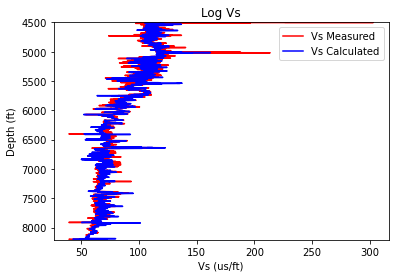

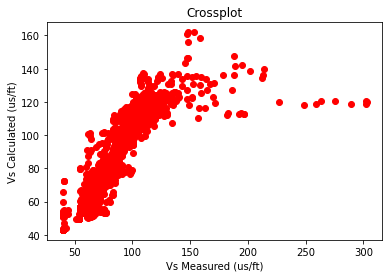

In [ ]:
plt.figure()
plt.plot(y,Depth,color='red',label='Vs Measured')
plt.plot(Vs_cal,Depth,color='blue',label='Vs Calculated')
plt.ylim(max(Depth),min(Depth))
plt.title('Log Vs')
plt.ylabel('Depth (ft)')
plt.xlabel('Vs (us/ft)')
plt.legend()
plt.figure()
plt.scatter(y,Vs_cal,color='red',label='data')
plt.title('Crossplot')
plt.xlabel('Vs Measured (us/ft)')
plt.ylabel('Vs Calculated (us/ft)')
plt.show()